Lot of data is hidden in a date time data, For example

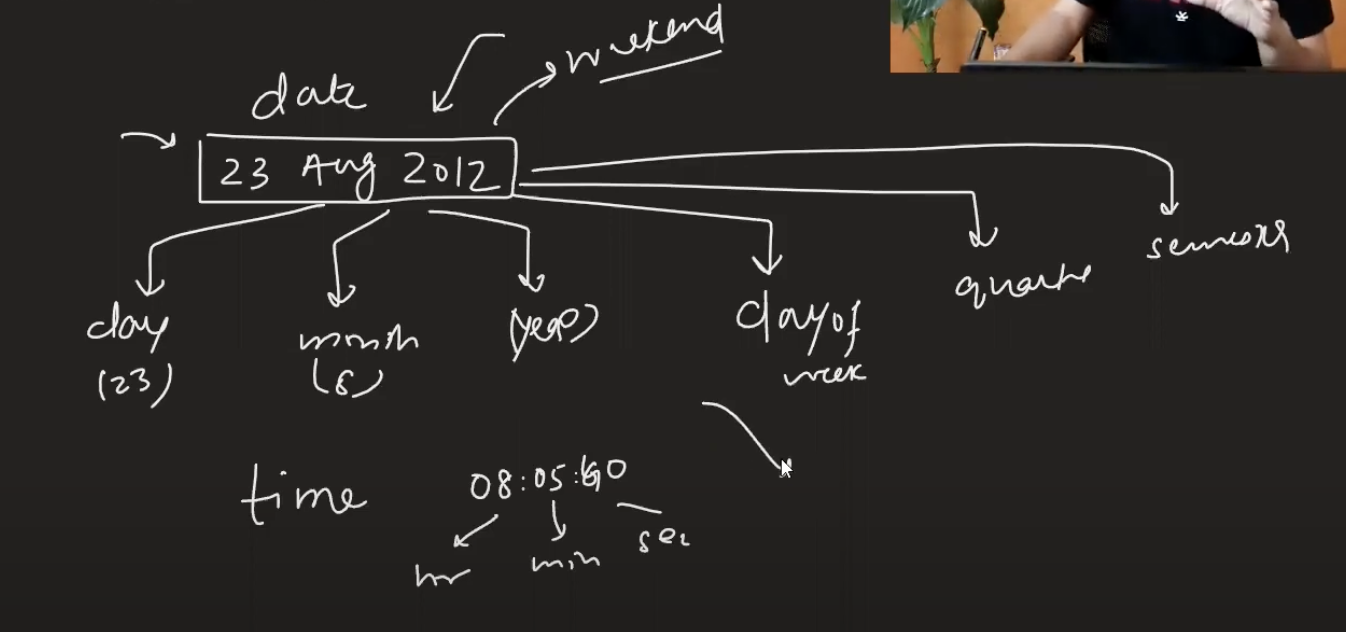

In [1]:
import pandas as pd
import numpy as np

In [2]:
date = pd.read_csv("orders.csv")
time = pd.read_csv("messages.csv")

In [3]:
date.head()

date  product_id  city_id  orders
0  2019-12-10        5628       25       3
1  2018-08-15        3646       14     157
2  2018-10-23        1859       25       1
3  2019-08-17        7292       25       1
4  2019-01-06        4344       25       3

In [4]:
time.head()

date                                                msg
0  2013-12-15 00:50:00                           ищу на сегодня мужика 37
1  2014-04-29 23:40:00   ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826
2  2012-12-30 00:21:00           Днепр.м 43 позн.с д/ж *.о  067.16.34.576
3  2014-11-28 00:31:00  КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...
4  2013-10-26 23:11:00    Зая я тебя никогда не обижу  люблю тебя!)  Даше

In [5]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        1000 non-null   object
 1   product_id  1000 non-null   int64 
 2   city_id     1000 non-null   int64 
 3   orders      1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [6]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1000 non-null   object
 1   msg     1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


# A. Working with Dates

In [7]:
date['date'] = pd.to_datetime(date['date'])

In [9]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1000 non-null   datetime64[ns]
 1   product_id  1000 non-null   int64         
 2   city_id     1000 non-null   int64         
 3   orders      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 31.4 KB


## 1. Extract year

In [10]:
date['date_year'] = date['date'].dt.year

<Axes: xlabel='date_year'>

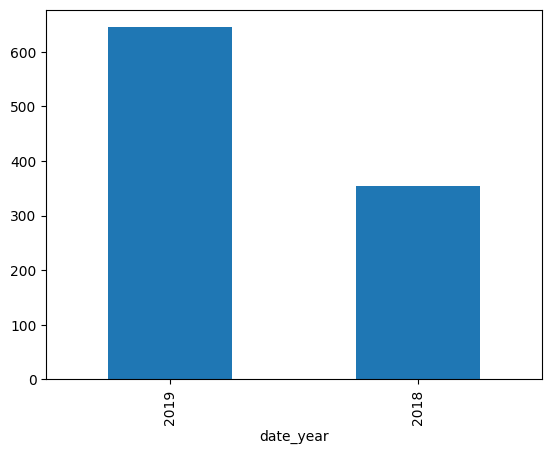

In [11]:
date['date_year'].value_counts().plot(kind = 'bar')

## 2. Extract Month

<Axes: xlabel='date_month_no'>

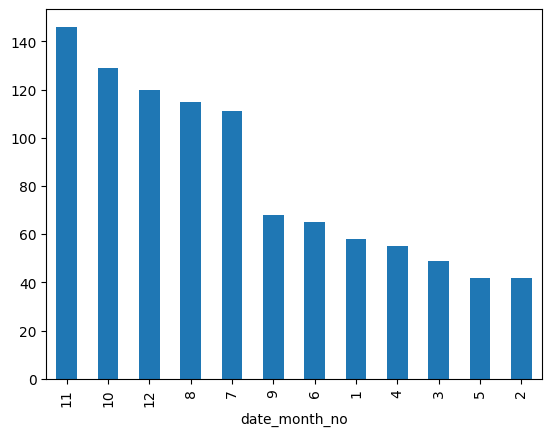

In [12]:
date['date_month_no'] = date['date'].dt.month
date['date_month_no'].value_counts().plot(kind = 'bar')

<Axes: xlabel='date_month_month'>

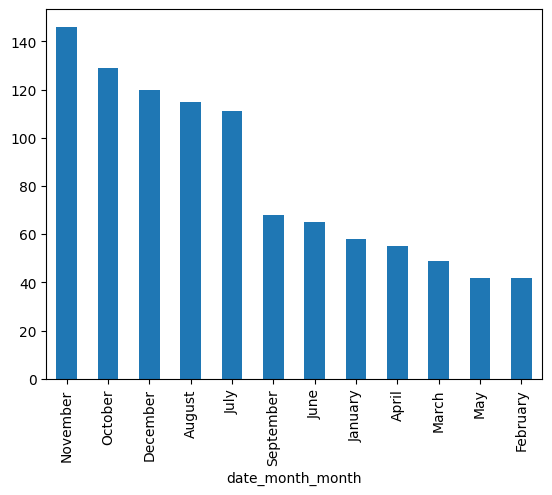

In [13]:
date['date_month_month'] = date['date'].dt.month_name()
date['date_month_month'].value_counts().plot(kind = 'bar')

## 3. Extract Days

<Axes: xlabel='date_day'>

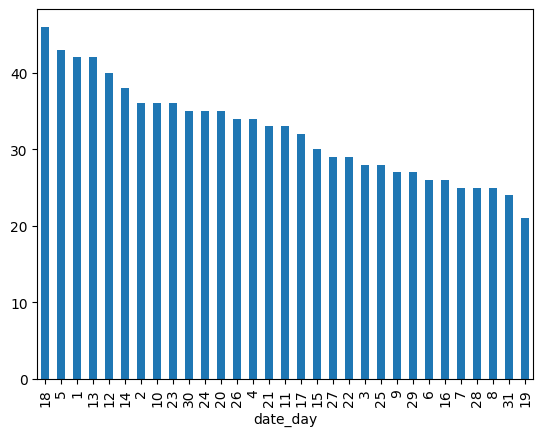

In [14]:
date['date_day'] = date['date'].dt.day
date['date_day'].value_counts().plot(kind = 'bar')

## 4. Extract day of week

<Axes: xlabel='day_dow'>

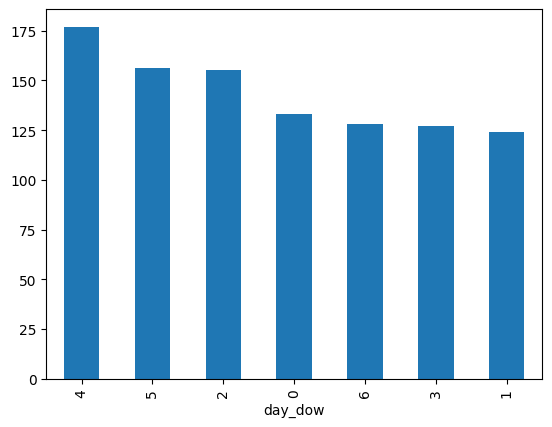

In [15]:
date['day_dow'] = date['date'].dt.dayofweek
date['day_dow'].value_counts().plot(kind = 'bar')

<Axes: xlabel='day_dow_name'>

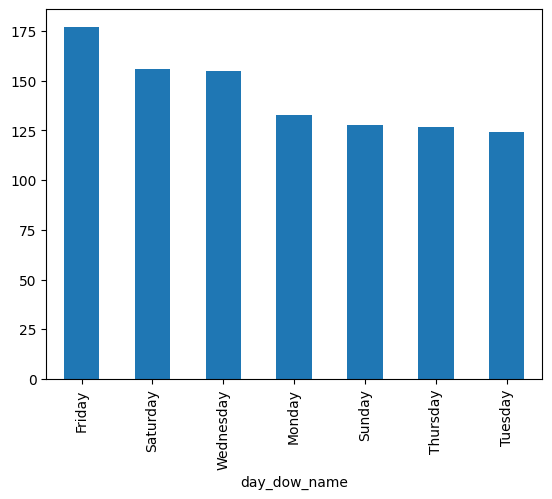

In [16]:
date['day_dow_name'] = date['date'].dt.day_name()
date['day_dow_name'].value_counts().plot(kind = 'bar')

## 5. Check Weekend

In [20]:
date['weekend'] = np.where(date['day_dow_name'].isin(['Sunday', 'Saturday']), 1, 0)
date['weekend']

0      0
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Name: weekend, Length: 1000, dtype: int64

In [27]:
date.head()

date  date_year  date_month_no date_month_month  date_day  day_dow  \
0 2019-12-10       2019             12         December        10        1   
1 2018-08-15       2018              8           August        15        2   
2 2018-10-23       2018             10          October        23        1   
3 2019-08-17       2019              8           August        17        5   
4 2019-01-06       2019              1          January         6        6   

  day_dow_name  weekend  
0      Tuesday        0  
1    Wednesday        0  
2      Tuesday        0  
3     Saturday        1  
4       Sunday        1

In [28]:
# date.drop(columns = ['product_id', 'city_id', 'orders'], axis = 1,  inplace = True)

## 6. Extract Week

In [33]:
date['date_week'] = date['date'].dt.isocalendar().week

date.head()

date  date_year  date_month_no date_month_month  date_day  day_dow  \
0 2019-12-10       2019             12         December        10        1   
1 2018-08-15       2018              8           August        15        2   
2 2018-10-23       2018             10          October        23        1   
3 2019-08-17       2019              8           August        17        5   
4 2019-01-06       2019              1          January         6        6   

  day_dow_name  weekend  date_week  
0      Tuesday        0         50  
1    Wednesday        0         33  
2      Tuesday        0         43  
3     Saturday        1         33  
4       Sunday        1          1

## 7. Extract Quarter

<Axes: xlabel='date_quarter'>

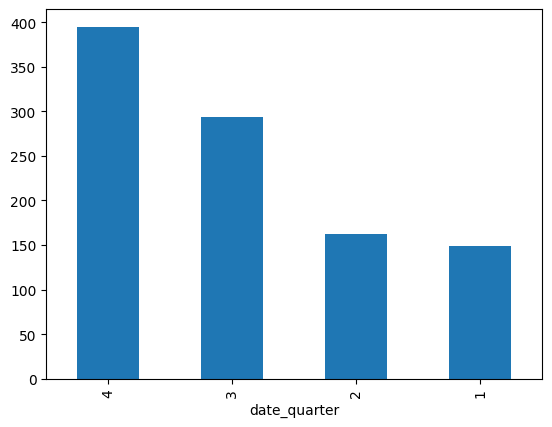

In [36]:
date['date_quarter'] = date['date'].dt.quarter

date['date_quarter'].value_counts().plot(kind = 'bar')

In [37]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              1000 non-null   datetime64[ns]
 1   date_year         1000 non-null   int32         
 2   date_month_no     1000 non-null   int32         
 3   date_month_month  1000 non-null   object        
 4   date_day          1000 non-null   int32         
 5   day_dow           1000 non-null   int32         
 6   day_dow_name      1000 non-null   object        
 7   weekend           1000 non-null   int64         
 8   date_week         1000 non-null   UInt32        
 9   date_quarter      1000 non-null   int32         
dtypes: UInt32(1), datetime64[ns](1), int32(5), int64(1), object(2)
memory usage: 55.8+ KB


## 8. Extract Semester

<Axes: xlabel='semester'>

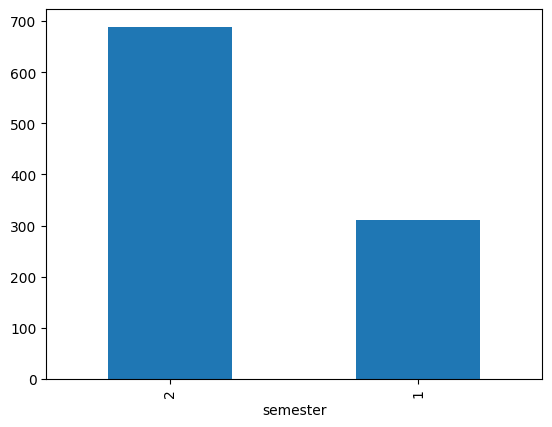

In [39]:
date['semester'] = np.where(date['date_quarter'].isin([1, 2]), 1, 2)
date['semester'].value_counts().plot(kind = 'bar')

## 9. Extract time elapsed between dates

In [40]:
import datetime

today = datetime.datetime.today()

In [41]:
today

datetime.datetime(2023, 12, 16, 12, 2, 58, 955315)

In [43]:
today - date['date']

0     1467 days 12:02:58.955315
1     1949 days 12:02:58.955315
2     1880 days 12:02:58.955315
3     1582 days 12:02:58.955315
4     1805 days 12:02:58.955315
                 ...           
995   1895 days 12:02:58.955315
996   1836 days 12:02:58.955315
997   1684 days 12:02:58.955315
998   1749 days 12:02:58.955315
999   1523 days 12:02:58.955315
Name: date, Length: 1000, dtype: timedelta64[ns]

In [44]:
# Number of days
(today - date['date']).dt.days

0      1467
1      1949
2      1880
3      1582
4      1805
       ... 
995    1895
996    1836
997    1684
998    1749
999    1523
Name: date, Length: 1000, dtype: int64

In [45]:
# Month
np.round((today - date['date'])/ np.timedelta64(1, 'M'), 0)

0      47.0
1      63.0
2      61.0
3      51.0
4      58.0
       ... 
995    61.0
996    59.0
997    54.0
998    56.0
999    49.0
Name: date, Length: 1000, dtype: float64

# B. Working with time

In [46]:
time.head()

date                                                msg
0  2013-12-15 00:50:00                           ищу на сегодня мужика 37
1  2014-04-29 23:40:00   ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826
2  2012-12-30 00:21:00           Днепр.м 43 позн.с д/ж *.о  067.16.34.576
3  2014-11-28 00:31:00  КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...
4  2013-10-26 23:11:00    Зая я тебя никогда не обижу  люблю тебя!)  Даше

In [47]:
time.drop('msg', axis = 1, inplace = True)

In [48]:
time.head()

date
0  2013-12-15 00:50:00
1  2014-04-29 23:40:00
2  2012-12-30 00:21:00
3  2014-11-28 00:31:00
4  2013-10-26 23:11:00

In [49]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [50]:
time['date'] = pd.to_datetime(time['date'])

In [51]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.9 KB


## 1. Extract hour, minute and seconds

In [52]:
time['hour'] = time['date'].dt.hour
time['min'] = time['date'].dt.minute
time['sec'] = time['date'].dt.second

In [53]:
time.head()

date  hour  min  sec
0 2013-12-15 00:50:00     0   50    0
1 2014-04-29 23:40:00    23   40    0
2 2012-12-30 00:21:00     0   21    0
3 2014-11-28 00:31:00     0   31    0
4 2013-10-26 23:11:00    23   11    0

## 2. Extract time

In [54]:
time['time'] = time['date'].dt.time

In [55]:
time['time']

0      00:50:00
1      23:40:00
2      00:21:00
3      00:31:00
4      23:11:00
         ...   
995    00:50:00
996    23:14:00
997    23:37:00
998    23:34:00
999    23:25:00
Name: time, Length: 1000, dtype: object

In [56]:
time.head()

date  hour  min  sec      time
0 2013-12-15 00:50:00     0   50    0  00:50:00
1 2014-04-29 23:40:00    23   40    0  23:40:00
2 2012-12-30 00:21:00     0   21    0  00:21:00
3 2014-11-28 00:31:00     0   31    0  00:31:00
4 2013-10-26 23:11:00    23   11    0  23:11:00

## 3. Time difference

In [57]:
today - time['date']

0     3653 days 11:12:58.955315
1     3517 days 12:22:58.955315
2     4003 days 11:41:58.955315
3     3305 days 11:31:58.955315
4     3702 days 12:51:58.955315
                 ...           
995   4292 days 11:12:58.955315
996   3613 days 12:48:58.955315
997   4078 days 12:25:58.955315
998   4194 days 12:28:58.955315
999   3466 days 12:37:58.955315
Name: date, Length: 1000, dtype: timedelta64[ns]

In [58]:
# In seconds

(today - time['date'])/np.timedelta64(1, 's')

0      3.156596e+08
1      3.039134e+08
2      3.459013e+08
3      2.855935e+08
4      3.198991e+08
           ...     
995    3.708692e+08
996    3.122093e+08
997    3.523840e+08
998    3.624065e+08
999    2.995079e+08
Name: date, Length: 1000, dtype: float64

In [59]:
# In mininutes

(today - time['date'])/np.timedelta64(1, 'm')

0      5.260993e+06
1      5.065223e+06
2      5.765022e+06
3      4.759892e+06
4      5.331652e+06
           ...     
995    6.181153e+06
996    5.203489e+06
997    5.873066e+06
998    6.040109e+06
999    4.991798e+06
Name: date, Length: 1000, dtype: float64

In [60]:
# In hours

(today - time['date'])/np.timedelta64(1, 'h')

0       87683.216376
1       84420.383043
2       96083.699710
3       79331.533043
4       88860.866376
           ...      
995    103019.216376
996     86724.816376
997     97884.433043
998    100668.483043
999     83196.633043
Name: date, Length: 1000, dtype: float64